There are a bunch of experiments with different topological losses based on library https://github.com/bruel-gabrielsson/TopologyLayer.git

In [1]:
import torch, numpy as np, matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import topo_loss as tl

In [5]:
circle_cloud = tl.gen_circle()
random_cloud = tl.gen_random_cloud(num_samples=30)

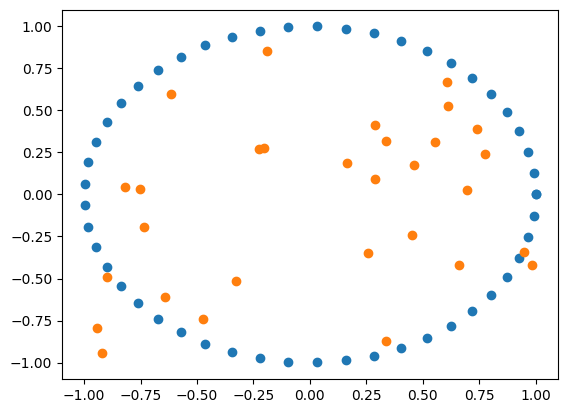

In [6]:
plt.scatter(circle_cloud[:,0], circle_cloud[:,1])
plt.scatter(random_cloud[:,0], random_cloud[:,1])
plt.show()

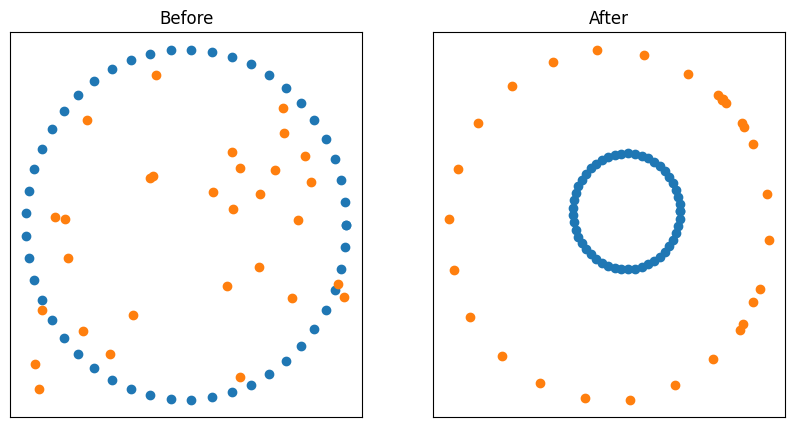

In [46]:
from topologylayer.nn import AlphaLayer, BarcodePolyFeature
import torch, numpy as np, matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()


# random pointcloud
np.random.seed(42)

# optimization to increase size of holes
layer = AlphaLayer(maxdim=1)
x = torch.autograd.Variable(torch.tensor(random_cloud).type(torch.float), requires_grad=True)
y = torch.tensor(circle_cloud, requires_grad=False, dtype=torch.float)
f1 = BarcodePolyFeature(1,2,1)

optimizer = torch.optim.Adam([x], lr=1e-2)
for i in range(500):
    optimizer.zero_grad()
    loss = -f1(layer(x)) + f1(layer(y))

    writer.add_scalar('Loss/loss', loss, i)
    
    loss.backward()
    optimizer.step()

# save figure
y = x.detach().numpy()
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(circle_cloud[:,0], circle_cloud[:,1])
ax[0].scatter(random_cloud[:,0], random_cloud[:,1])
ax[0].set_title("Before")
ax[1].scatter(circle_cloud[:,0], circle_cloud[:,1])
ax[1].scatter(y[:,0], y[:,1])
ax[1].set_title("After")
for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params(bottom=False, left=False)
plt.savefig('holes.png')

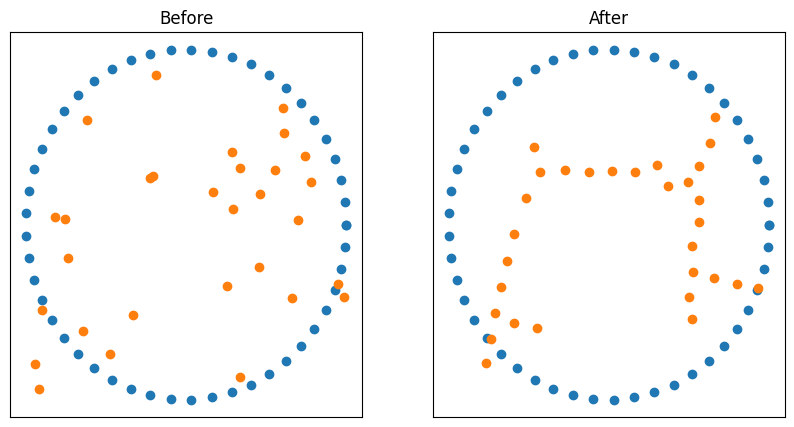

In [28]:
from topologylayer.nn import AlphaLayer, BarcodePolyFeature, TopKBarcodeLengths, RipsLayer
import torch, numpy as np, matplotlib.pyplot as plt

# random pointcloud
np.random.seed(42)

# optimization to increase size of holes
# layer = AlphaLayer(maxdim=1)
circle_layer = RipsLayer(len(circle_cloud), maxdim=0)
random_layer = RipsLayer(len(random_cloud), maxdim=0)

random_tensor = torch.autograd.Variable(torch.tensor(random_cloud).type(torch.float), requires_grad=True)
circle_tensor = torch.tensor(circle_cloud, requires_grad=False, dtype=torch.float)
# f1 = BarcodePolyFeature(1,2,1)
f2 = TopKBarcodeLengths(dim=0, k=10)

optimizer = torch.optim.Adam([random_tensor], lr=1e-2)
for i in range(50):
    optimizer.zero_grad()
    loss = torch.abs(torch.sum(f2(circle_layer(circle_tensor))) - torch.sum(f2(random_layer(random_tensor))))
    loss.backward()
    optimizer.step()

# save figure
y = random_tensor.detach().numpy()
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(circle_cloud[:,0], circle_cloud[:,1])
ax[0].scatter(random_cloud[:,0], random_cloud[:,1])
ax[0].set_title("Before")
ax[1].scatter(circle_cloud[:,0], circle_cloud[:,1])
ax[1].scatter(y[:,0], y[:,1])
ax[1].set_title("After")
for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params(bottom=False, left=False)
plt.savefig('holes.png')

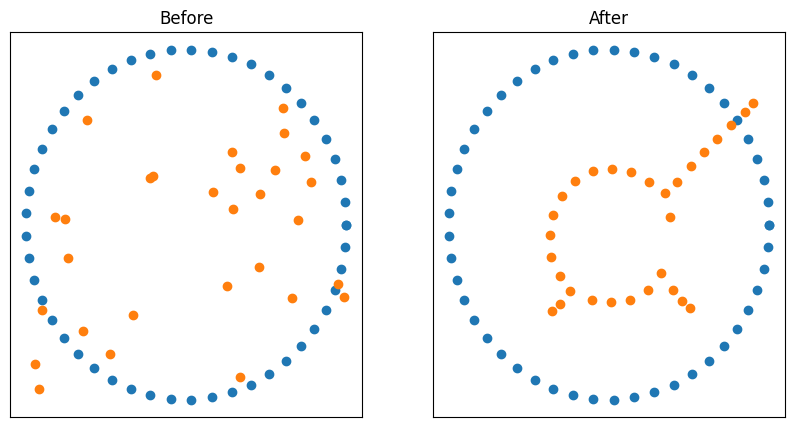

In [48]:
from topologylayer.nn import AlphaLayer, BarcodePolyFeature, TopKBarcodeLengths, RipsLayer
import torch, numpy as np, matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

# random pointcloud
np.random.seed(42)

# optimization to increase size of holes
alpha_layer = AlphaLayer(maxdim=1)
circle_layer = RipsLayer(len(circle_cloud), maxdim=0)
random_layer = RipsLayer(len(random_cloud), maxdim=0)

random_tensor = torch.autograd.Variable(torch.tensor(random_cloud).type(torch.float), requires_grad=True)
circle_tensor = torch.tensor(circle_cloud, requires_grad=False, dtype=torch.float)
f1 = BarcodePolyFeature(1,2,1)
f2 = TopKBarcodeLengths(dim=0, k=10)



optimizer = torch.optim.Adam([random_tensor], lr=1e-2)
for i in range(1000):
    optimizer.zero_grad()
    barcode_loss = torch.abs(torch.sum(f2(circle_layer(circle_tensor))) - torch.sum(f2(random_layer(random_tensor))))
    barcode_loss.backward()
    
    poly_loss = -f1(alpha_layer(circle_tensor)) - f1(alpha_layer(random_tensor))
    poly_loss.backward()
    
    mean_loss = torch.mean(torch.abs(circle_tensor)) - torch.mean(torch.abs(random_tensor))      
    mean_loss.backward()

    writer.add_scalar('Loss/barcode_loss', barcode_loss, i)
    writer.add_scalar('Loss/poly_loss', poly_loss, i)
    writer.add_scalar('Loss/mean_loss', mean_loss, i)
    
    optimizer.step()

# save figure
y = random_tensor.detach().numpy()
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(circle_cloud[:,0], circle_cloud[:,1])
ax[0].scatter(random_cloud[:,0], random_cloud[:,1])
ax[0].set_title("Before")
ax[1].scatter(circle_cloud[:,0], circle_cloud[:,1])
ax[1].scatter(y[:,0], y[:,1])
ax[1].set_title("After")
for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params(bottom=False, left=False)
plt.savefig('holes.png')

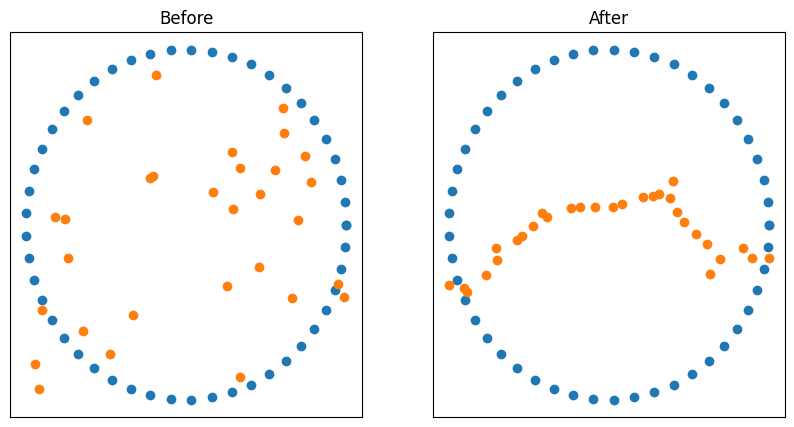

In [56]:
from topologylayer.nn import AlphaLayer, BarcodePolyFeature, TopKBarcodeLengths, RipsLayer
import torch, numpy as np, matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

# random pointcloud
np.random.seed(42)

# optimization to increase size of holes
alpha_layer = AlphaLayer(maxdim=1)
circle_layer = RipsLayer(len(circle_cloud), maxdim=0)
random_layer = RipsLayer(len(random_cloud), maxdim=0)

random_tensor = torch.autograd.Variable(torch.tensor(random_cloud).type(torch.float), requires_grad=True)
circle_tensor = torch.tensor(circle_cloud, requires_grad=False, dtype=torch.float)
f1 = BarcodePolyFeature(1,2,1)
f2 = TopKBarcodeLengths(dim=0, k=10)



optimizer = torch.optim.Adam([random_tensor], lr=1e-2)
for i in range(1000):
    optimizer.zero_grad()
    barcode_loss = torch.abs(torch.sum(f2(circle_layer(circle_tensor))) - torch.sum(f2(random_layer(random_tensor))))
    barcode_loss.backward()
    
    poly_loss = f1(alpha_layer(circle_tensor)) + f1(alpha_layer(random_tensor))
    poly_loss.backward()
    
    max_loss = torch.abs(torch.abs(torch.max(circle_tensor)) - torch.abs(torch.max(random_tensor)))
    min_loss = torch.abs(torch.abs(torch.min(circle_tensor)) - torch.abs(torch.min(random_tensor)))
    min_max_loss = min_loss + max_loss
    min_max_loss.backward()

    writer.add_scalar('Loss/barcode_loss', barcode_loss, i)
    writer.add_scalar('Loss/poly_loss', poly_loss, i)
    writer.add_scalar('Loss/min_max_loss', min_max_loss, i)
    
    optimizer.step()

# save figure
y = random_tensor.detach().numpy()
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
ax[0].scatter(circle_cloud[:,0], circle_cloud[:,1])
ax[0].scatter(random_cloud[:,0], random_cloud[:,1])
ax[0].set_title("Before")
ax[1].scatter(circle_cloud[:,0], circle_cloud[:,1])
ax[1].scatter(y[:,0], y[:,1])
ax[1].set_title("After")
for i in range(2):
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].tick_params(bottom=False, left=False)
plt.savefig('holes.png')